# Imports and drive

In [34]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import random
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read images and create dataset

In [35]:
base_path = '/content/drive/MyDrive/2024/Docencia/Visión con IA/4. Aprendizaje Profundo/Ejemplos/'
folder = '3scenes/'
subfolders = ['coast', 'forest', 'highway']

data = []
labels = []
for subfolder in subfolders:
  files = [f for f in os.listdir(base_path + folder + subfolder) if f.endswith('.jpg')]
  for file in files:
    img = cv2.imread(base_path + folder + subfolder + '/' + file, cv2.IMREAD_COLOR)
    img = img.astype('float32') / 255.0
    img = cv2.resize(img, (128, 128))
    data.append(img)
    labels.append(subfolder)

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split dataset into train and test

In [37]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)

# Define model architecture

In [38]:
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(128, 128, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation("softmax"))

#Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │          24,579 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,611 (119.57 KB)

 Trainable params: 30,611 (119.57 KB)

 Non-trainable params: 0 (0.00 B)

# Compile model and train

In [40]:
opt = Adam(learning_rate=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),	epochs=15, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - accuracy: 0.9647 - loss: 0.1035 - val_accuracy: 0.8625 - val_loss: 0.5857
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.9824 - loss: 0.0646 - val_accuracy: 0.9208 - val_loss: 0.3261
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 374ms/step - accuracy: 0.9866 - loss: 0.0512 - val_accuracy: 0.9292 - val_loss: 0.2959
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.9951 - loss: 0.0259 - val_accuracy: 0.9208 - val_loss: 0.3348
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 352ms/step - accuracy: 0.9974 - loss: 0.0234 - val_accuracy: 0.9042 - val_loss: 0.3514
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.9951 - loss: 0.0215 - val_accuracy: 0.9167 - val_loss: 0.3348
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.9993 - loss: 0.0151 - val_accuracy: 0.9250 - val_loss: 0.3515
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 330ms/step - accuracy: 0.9980 - loss: 0.0142 - val_accuracy

# Evaluate model

In [43]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),	predictions.argmax(axis=1), target_names=lb.classes_))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
              precision    recall  f1-score   support

       coast       0.92      0.94      0.93        96
      forest       1.00      0.92      0.96        85
     highway       0.83      0.90      0.86        59

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.93      0.92      0.92       240



In [44]:
print(lb.classes_)

['coast' 'forest' 'highway']


# Test on random sample

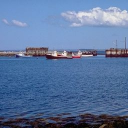

Ground truth class:  coast
Predicted class:  coast


In [56]:
rand_pos = random.randint(0, len(testX))
rand_img = testX[rand_pos]
rand_img_resized = 255 * cv2.resize(rand_img, (128, 128))
cv2_imshow(rand_img_resized)

print('Ground truth class: ', lb.classes_[np.argmax(testY[rand_pos])])
print('Predicted class: ', lb.classes_[np.argmax(predictions[rand_pos])])